<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Linear_Regression_RNA_Fert_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 'RNA' Fertilizer Example, Y = 2x + ϵ.
**Goal** is to predict crop yield given an amount of RNA-based fertillzer (in g per hectare.)

In [1]:
# Start with making the x and y data

import torch
import matplotlib.pyplot as plt

Declaring random values for x.

NOTE: I am starting with a very small x and y tensor to build up from there.

In [2]:
# low_bound = 0
# high_bound = 10

# To get inital set and saving it to be repated later.
# x = (high_bound - low_bound) * torch.rand(1,10) + low_bound
# print(x)

x= torch.tensor([8.2810, 5.7706, 3.8419, 7.8171, 7.5566, 1.7474, 5.0420, 4.3833, 9.6980, 4.4339])
print(x)


tensor([8.2810, 5.7706, 3.8419, 7.8171, 7.5566, 1.7474, 5.0420, 4.3833, 9.6980,
        4.4339])


Calculating the Y values with the random noise.

In [3]:
# Creating y.
# Number of zeroes must match the previous tensor
# Standard deviaton of 3 to try to simulate over fertilzerting crops.

y = 2*x + torch.normal(mean=torch.zeros(10), std=3)
print(y)

tensor([14.0540,  8.0518,  8.7807, 15.1993, 14.0149,  0.6446, 12.2725,  2.4221,
        11.9035,  6.4121])


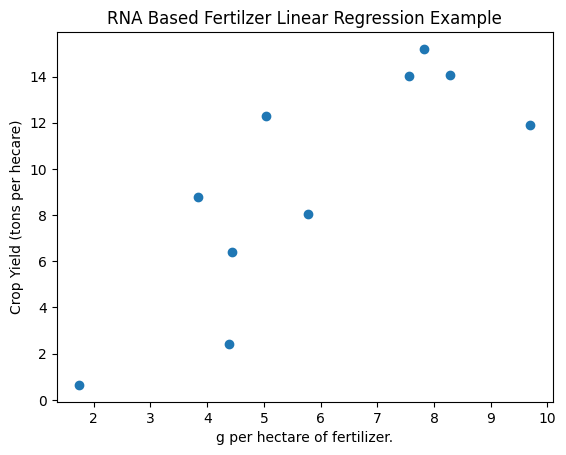

In [4]:
# Plotting the points

fig, ax = plt.subplots()
plt.title("RNA Based Fertilzer Linear Regression Example")
plt.xlabel("g per hectare of fertilizer.")
plt.ylabel("Crop Yield (tons per hecare)")
_ = ax.scatter(x, y)

Starting the regression model

In [5]:
# Starting the values low to make the model inaccurate at first to encourage learning.
m = torch.tensor([0.5]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

In [6]:
def regression(my_m, my_x, my_b):
  return my_m*my_x + my_b

In [7]:
def regression_plot(my_x, my_y, my_b, my_m):
  fig, ax = plt.subplots()

  ax.scatter(my_x, my_y)

  x_min, x_max = ax.get_xlim()
  y_min = regression(x_min, my_m, my_b).detach().item()
  y_max = regression(x_max, my_m, my_b).detach().item()

  ax.set_xlim([x_min, x_max])
  _ = ax.plot([x_min, x_max], [y_min, y_max])

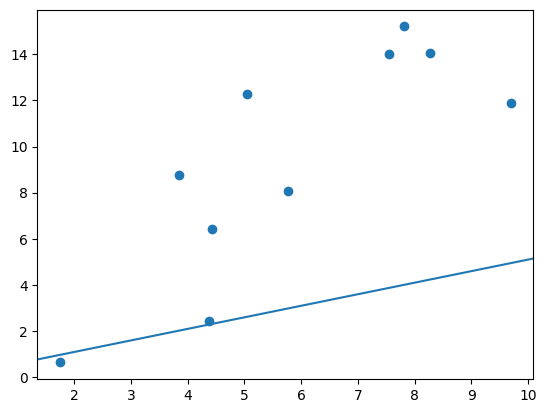

In [8]:
# Run the first iterration, which performs quite poor.

regression_plot(x, y, b, m)

# Machine Learning Time!

In [9]:
# Step 1: Find the y-hat values

y_hat = regression(m, x, b)
print(y_hat)

tensor([4.2405, 2.9853, 2.0210, 4.0086, 3.8783, 0.9737, 2.6210, 2.2916, 4.9490,
        2.3169], grad_fn=<AddBackward0>)


In [10]:
# Step 2: Set up the loss/cost function using MSE
# Done by hand for practice

def mse(my_y_hat, my_y):
  sigma = torch.sum(my_y_hat-my_y)**2
  return sigma/len(my_y)

In [11]:
C = mse(y_hat, y)
print(C)

tensor(402.8380, grad_fn=<DivBackward0>)


In [12]:
# Step 3: Calcuate gradient
C.backward()

# Access gradients, m seems to decrease the cost function the most.
print(m.grad)
print(b.grad)


tensor([-743.5048])
tensor([-126.9390])


In [13]:
# Step 4: Optimizer using Pytorch's SGD

optimizer = torch.optim.SGD([m, b], lr=0.001)
optimizer.step()

Checking m and b got changed... Although they are worse now...

In [14]:
m

tensor([1.2435], requires_grad=True)

In [15]:
b

tensor([0.2269], requires_grad=True)

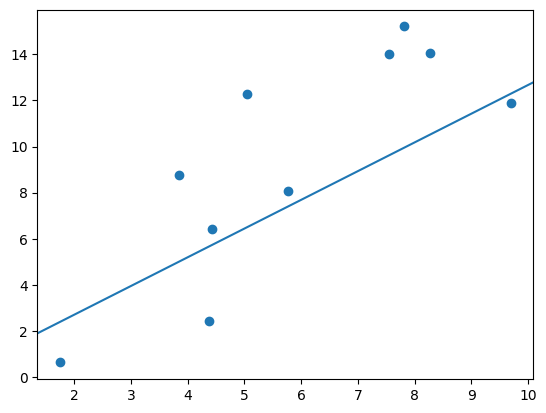

In [16]:
regression_plot(x, y, b, m)

In [17]:
# Checking if the cost function decreased. It did! LEARNING!!!

C= mse(regression(m, x, b), y)
C

tensor(34.7886, grad_fn=<DivBackward0>)

In [18]:
# More learning time!
# Picked 200 after running it the first time with 1000. It learns pretty quickly after 10 runs.

epochs = 200
for epoch in range(epochs):

    optimizer.zero_grad()

    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2

    C.backward() # Step 3
    optimizer.step() # Step 4

    print(f'Epoch {epoch}, cost {C.item():.3g}, m grad {m.grad.item():.3g}, b grad {b.grad.item():.3g}')

Epoch 0, cost 34.8, m grad -218, b grad -37.3
Epoch 1, cost 3, m grad -64.2, b grad -11
Epoch 2, cost 0.259, m grad -18.9, b grad -3.22
Epoch 3, cost 0.0224, m grad -5.54, b grad -0.947
Epoch 4, cost 0.00193, m grad -1.63, b grad -0.278
Epoch 5, cost 0.000167, m grad -0.479, b grad -0.0817
Epoch 6, cost 1.44e-05, m grad -0.141, b grad -0.024
Epoch 7, cost 1.25e-06, m grad -0.0414, b grad -0.00706
Epoch 8, cost 1.08e-07, m grad -0.0122, b grad -0.00208
Epoch 9, cost 9.2e-09, m grad -0.00355, b grad -0.000607
Epoch 10, cost 7.78e-10, m grad -0.00103, b grad -0.000176
Epoch 11, cost 5.91e-11, m grad -0.000285, b grad -4.86e-05
Epoch 12, cost 1e-11, m grad -0.000117, b grad -2e-05
Epoch 13, cost 8.19e-13, m grad -3.35e-05, b grad -5.72e-06
Epoch 14, cost 8.19e-13, m grad -3.35e-05, b grad -5.72e-06
Epoch 15, cost 8.19e-13, m grad -3.35e-05, b grad -5.72e-06
Epoch 16, cost 8.19e-13, m grad -3.35e-05, b grad -5.72e-06
Epoch 17, cost 8.19e-13, m grad -3.35e-05, b grad -5.72e-06
Epoch 18, cost

tensor(8.1855e-13, grad_fn=<DivBackward0>)


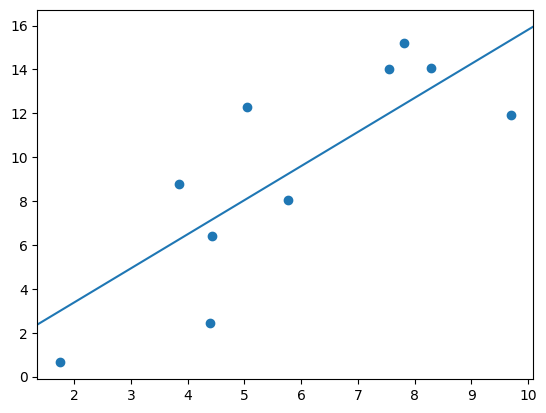

In [19]:
# Plottig the last epoch... moment of truth.

regression_plot(x, y, b, m)
print(C)